## TONGA at FUR

In [1]:
import obspy as obs
import matplotlib.pyplot as plt

from obspy.clients.fdsn.client import Client
from andbro__querrySeismoData import __querrySeismoData
from andbro__makeplot_trace_spectrogram import __makeplot_trace_spectrogram

In [2]:
config = {}

config['fmin'] = 0.001 # Hz
config['fmax'] = 0.1 # Hz

config['tbeg'] = obs.UTCDateTime("2022-01-15 02:00")
config['tend'] = obs.UTCDateTime("2022-01-16 12:00")

config['event_origin'] = obs.UTCDateTime("2022-01-15 04:15")

config['seed'] = "GR.FUR..BH*"

config['repository'] = "jane"

In [3]:
c = Client("BGR")

st0 = c.get_waveforms("GR", "FUR", "", "LH*", config['tbeg'], config['tend'])

inv = c.get_stations(network="GR", station="FUR",
                     starttime=config['tbeg'], endtime=config['tend'], 
                      level="response")

In [4]:
st = st0.copy();

st.remove_response(inv);

st.detrend("demean");
st.taper(0.1);

st.write("/home/brotzer/Downloads/FUR_TONGA.ascii", format="TSPAIR")

st.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True);

st

3 Trace(s) in Stream:
GR.FUR..LHE | 2022-01-15T01:59:59.640000Z - 2022-01-16T11:59:59.640000Z | 1.0 Hz, 122401 samples
GR.FUR..LHN | 2022-01-15T01:59:59.640000Z - 2022-01-16T11:59:59.640000Z | 1.0 Hz, 122401 samples
GR.FUR..LHZ | 2022-01-15T01:59:59.640000Z - 2022-01-16T11:59:59.640000Z | 1.0 Hz, 122401 samples

3 Trace(s) in Stream:
GR.FUR..LHE | 2022-01-15T01:59:59.640000Z - 2022-01-16T11:59:59.640000Z | 1.0 Hz, 122401 samples
GR.FUR..LHN | 2022-01-15T01:59:59.640000Z - 2022-01-16T11:59:59.640000Z | 1.0 Hz, 122401 samples
GR.FUR..LHZ | 2022-01-15T01:59:59.640000Z - 2022-01-16T11:59:59.640000Z | 1.0 Hz, 122401 samples

3 Trace(s) in Stream:
GR.FUR..LHE | 2022-01-15T01:59:59.640000Z - 2022-01-16T11:59:59.640000Z | 1.0 Hz, 122401 samples
GR.FUR..LHN | 2022-01-15T01:59:59.640000Z - 2022-01-16T11:59:59.640000Z | 1.0 Hz, 122401 samples
GR.FUR..LHZ | 2022-01-15T01:59:59.640000Z - 2022-01-16T11:59:59.640000Z | 1.0 Hz, 122401 samples

3 Trace(s) in Stream:
GR.FUR..LHE | 2022-01-15T01:59:59.640000Z - 2022-01-16T11:59:59.640000Z | 1.0 Hz, 122401 samples
GR.FUR..LHN | 2022-01-15T01:59:59.640000Z - 2022-01-16T11:59:59.640000Z | 1.0 Hz, 122401 samples
GR.FUR..LHZ | 2022-01-15T01:59:59.640000Z - 2022-01-16T11:59:59.640000Z | 1.0 Hz, 122401 samples

3 Trace(s) in Stream:
GR.FUR..LHE | 2022-01-15T01:59:59.640000Z - 2022-01-16T11:59:59.640000Z | 1.0 Hz, 122401 samples
GR.FUR..LHN | 2022-01-15T01:59:59.640000Z - 2022-01-16T11:59:59.640000Z | 1.0 Hz, 122401 samples
GR.FUR..LHZ | 2022-01-15T01:59:59.640000Z - 2022-01-16T11:59:59.640000Z | 1.0 Hz, 122401 samples

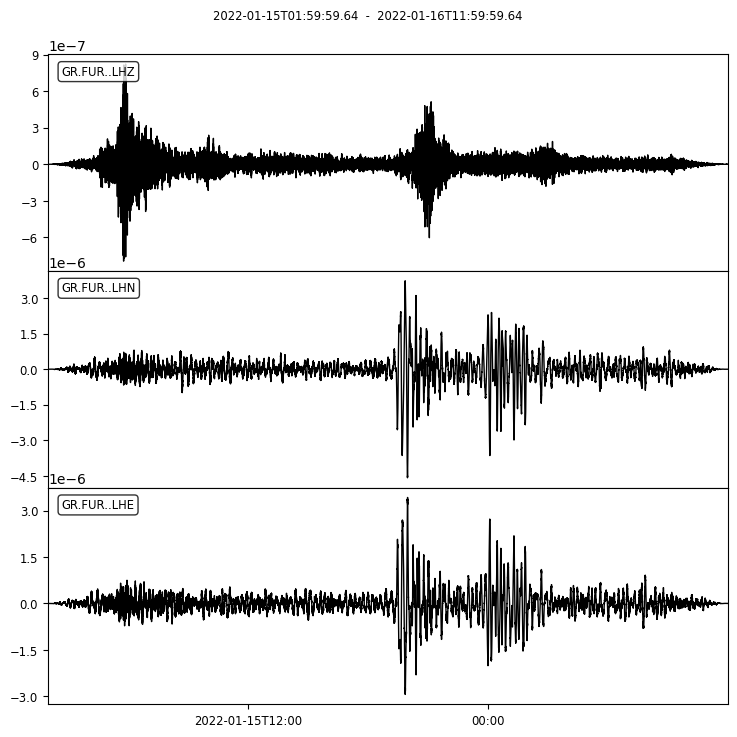

In [5]:
st.plot(equal_scale=False);

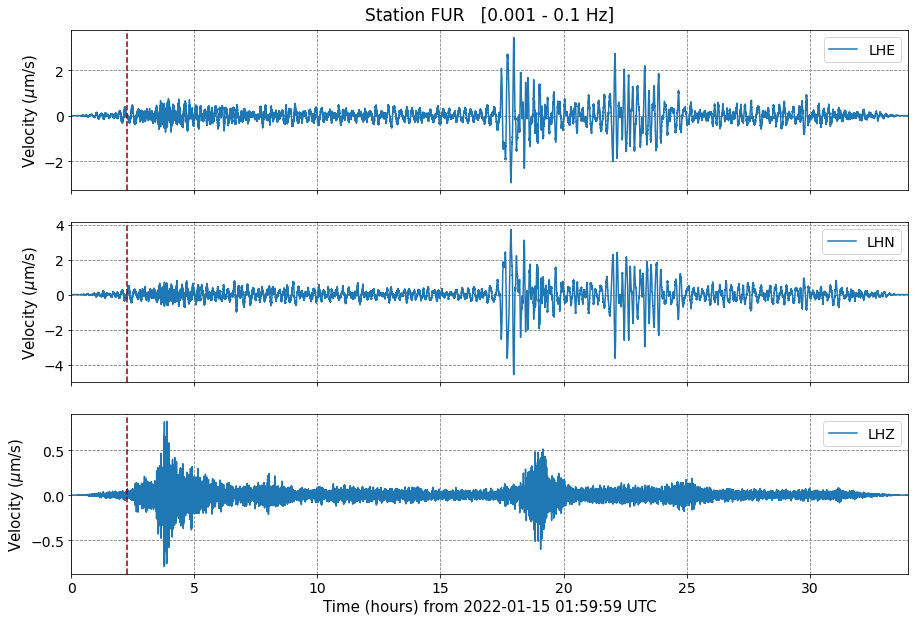

In [6]:
def __makeplot(config, st):
    
    font = 15
    
    fig, ax = plt.subplots(3,1, figsize=(15,10), sharex=True)
    
    for ii, tr in enumerate(st):
        
        ax[ii].plot(tr.times()/3600, tr.data*1e6, label=f'{tr.stats.channel}', zorder=2)
        
        ax[ii].set_ylabel(f"Velocity ($\mu$m/s)", fontsize=font)
        ax[ii].grid(ls="--", color="grey", zorder=0)
        ax[ii].set_xlim(0, max(tr.times()/3600))
        ax[ii].legend(fontsize=font-1)
    
        ax[ii].axvline((config['event_origin']-config['tbeg'])/3600, color="darkred", ls="--")
    
        ax[ii].tick_params(labelsize=font-1)
    
    ax[0].set_title(f"Station FUR   [{config['fmin']} - {config['fmax']} Hz]", fontsize=font+2, pad=10)
    ax[2].set_xlabel(f"Time (hours) from {tr.stats.starttime.date} {str(tr.stats.starttime.time)[:8]} UTC", fontsize=font)
    
    return fig

fig = __makeplot(config, st)

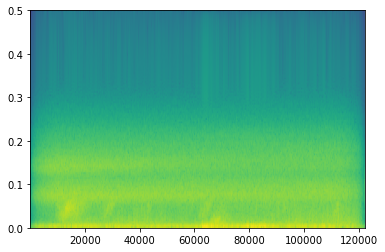

In [55]:
plt.specgram(st[0].data, 
             Fs=st[0].stats.sampling_rate,
             cmap="viridis",
            );
    

In [109]:
def __makeplot_trace_spectrogram(tr, f_upper=None, spec_param=None, ylabel=None, full_output=False, normalize=False, unit=None, cbar_log=None, f_scale_log=None):
    ''' 
    plot two traces with the correspsonding spectrogram

    VARIABLES:
        - tr:               trace or array 
        - f_upper:          upper frequency limit
        - ylabel:           tuple (label1, label2) for label on y-axis 
        - spec_param:       [nfft, nsegments, overlap]
        - full_output:      defines return valuse [fig  or  fig,Sxx,freqs]
        - normalize:        bool, normalize Spectrogram (default: False)
        - unit:             unit of time axis (['sec'], 'min', 'hour', 'day')

    DEPENDENCIES:
    
        import matplotlib.pyplot as plt
        from numpy import arange, where
        from scipy.signal import spectrogram

    OUTPUT:
        
        - fig               [full_output = False] 
        - fig, Sxx, freqs   [full_output = True]

    EXAMPLE:
    
        >>> fig = __makeplot_trace_spectrogram(tr, f_upper=None, spec_param=None, ylabel=None)

    '''
    
    import sys
    import matplotlib.pyplot as plt
    from scipy.signal import spectrogram
    from numpy import arange, where, nanmax, shape, meshgrid
    from matplotlib import colors as cl
    
    if spec_param is None:
        nfft, nseg, overlap = None, 256, 64
    else:
        nfft, nseg, overlap = spec_param


    if str(type(tr)) == "<class 'obspy.core.stream.Stream'>":
        sys.exit("ERROR: Please enter a trace not a stream object! Aborting ...")
        
    elif str(type(tr)) == "<class 'obspy.core.trace.Trace'>":
        
        dt = tr.stats.delta
        
        timeline = arange(0, tr.stats.npts*tr.stats.delta, tr.stats.delta)
        
        l1, l2 = f"{tr.stats.station}.{tr.stats.channel}", f"{tr.stats.station}.{tr.stats.channel}"
        
        t0 = f"{tr.stats.starttime.date} {str(tr.stats.starttime.time)[:8]} UTC"
        
        freqs, times, Sxx = spectrogram(
                                        tr.data, 
                                        fs=1/tr.stats.delta,
                                        nfft=nfft,
                                        nperseg=nseg,
                                        noverlap=overlap,
                                        scaling="density",
                                        )
        
        print(f"Using windows of {round(tr.stats.delta*tr.stats.npts/nseg, 2)} seconds ")
    
    else:
        timeline = arange(0, len(tr), 1)
        l1 = "array"
        t0 = []

    ## reduce to upper frequency limit if provided
    if f_upper is not None:
        idx = where(freqs>=f_upper)[0][0]
        f_upper=freqs[idx]
        Sxx = Sxx[1:idx][:]
        freqs = freqs[1:idx]
    else:
        f_upper = 0.5/tr.stats.delta

        
    ## normalize the spectrogram
    if normalize:
#         Sxx /= abs(Sxx).max(axis=0)
        Sxx /= Sxx.max()
    
    
    ## adjust time scales
    unit_scale = {'sec':1, 'min':60, 'hour':3600, 'day':86400}        
    timeline /= unit_scale[unit]
    times /= unit_scale[unit]

    ## make mesh
    x, y = meshgrid(times, freqs)
    
    
    ## Plotting #####################################
        
    fig, ax = plt.subplots(2, 1, figsize=(17,10), sharex=True)

    plt.subplots_adjust(hspace=0.1)
    
    font = 16
        
    ax[0].plot(timeline, tr.data*1e6, label=l1)

    ## alternative
#     im1 = ax[1].imshow(Sxx[:][:], aspect='auto', cmap='viridis', origin='lower', 
#                        extent=[min(times), max(times), 0, f_upper])
    
    if cbar_log:
        im1 = ax[1].pcolormesh(x, y, Sxx,
                               cmap='viridis',
                               norm=cl.LogNorm(),
                              )
    else:
        im1 = ax[1].pcolormesh(x, y, Sxx,
                               cmap='viridis',
                              )
        

    cbaxes1 = fig.add_axes([0.92, 0.12, 0.02, 0.36]) 
    cb1 = plt.colorbar(im1 ,cax=cbaxes1, orientation='vertical')

    
    ax[0].tick_params(axis='both', labelsize=font-1)
    ax[1].tick_params(axis='both', labelsize=font-1)
        
    if ylabel is None:
        if tr.stats.channel[1] == "H":
            ax[0].set_ylabel(r"Velocity ($\mu$m/s)", fontsize=font)
#            ax[1].set_ylabel(r"ASD (m$^2$/(s$^2$ Hz))", fontsize=font)
            ax[1].set_ylabel(r"Frequency (Hz)", fontsize=font)
            cb1.set_label(label="Spectral Amplitude (m$^2$/(s$^2$ Hz))", size=font-1)    
        
        elif tr.stats.channel[1] == "J": 
            ax[0].set_ylabel(r"$\dot \Omega$ ($\mu$rad/s)", fontsize=font)
#            ax[1].set_ylabel(r"$\dot \Omega$ (rad$^2$/(s$^2$ Hz))", fontsize=font)
            ax[1].set_ylabel(r"Frequency (Hz)", fontsize=font)
            cb1.set_label(label=r"$\dot \Omega$ (rad$^2$/(s$^2$ Hz))", labelsize=font-1)    
        else:
            ax[0].set_ylabel(r"Amlitude", fontsize=font)
#            ax[1].set_ylabel(r"Amplitude (unit$^2$/ Hz))", fontsize=font) 
            ax[1].set_ylabel(r"Frequency (Hz)", fontsize=font)
            cb1.set_label(label=r"Amplitude (unit$^2$/ Hz))", size=font-1)
    else:
        ax[0].set_ylabel(ylabel[1], fontsize=font)
        ax[1].set_ylabel(ylabel[1], fontsize=font)

    if f_scale_log:
        ax[1].set_yscale("log")
        
    ax[0].tick_params(labelsize=font-1)
    ax[1].tick_params(labelsize=font-1)

    ax[0].legend(loc="upper right", fontsize=font-1)
    ax[1].set_xlabel(f"Time ({unit}) from {t0} ", fontsize=font)  
#     ax[1].set_ylim(0, f_upper)

    ax[0].set_xlim(min(timeline), max(timeline))
    ax[1].set_xlim(min(times), max(times))

    plt.show();
    
    if full_output:
        return fig, Sxx, freqs
    else:
        return fig 

Using windows of 306.0 seconds 


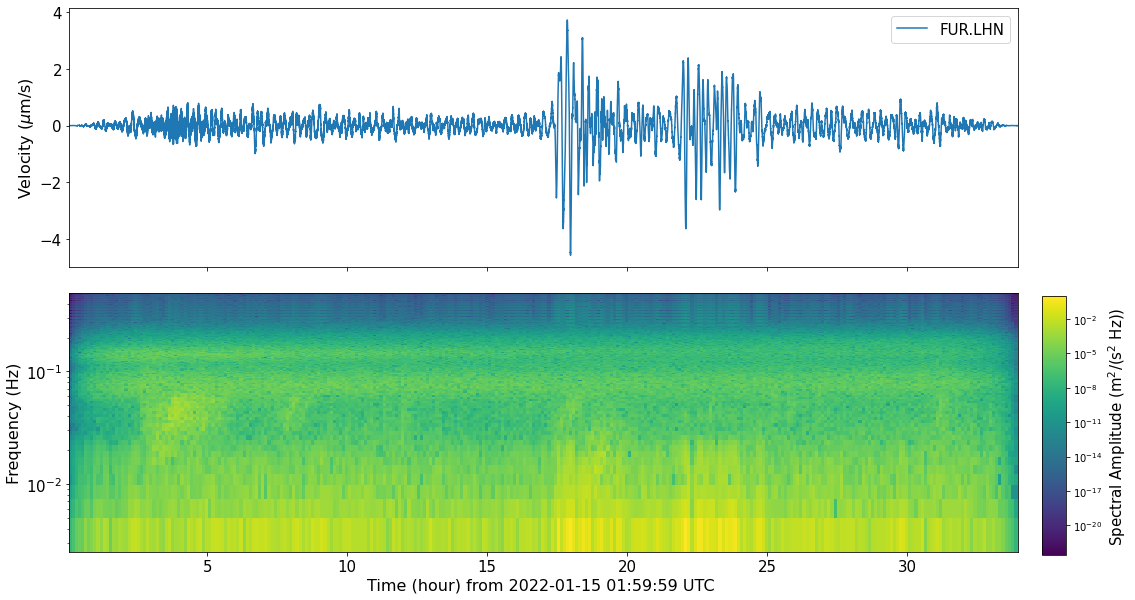

In [110]:
__makeplot_trace_spectrogram(    
                                st.select(channel="*N")[0],
                                f_upper=0.5,
                                spec_param=[None, 200*2, 0.5],
                                ylabel=None,
                                full_output=False,
                                normalize=True,
                                unit="hour",
                                cbar_log=True,
                                f_scale_log=True,
                            );

In [111]:
def __makeplot_trace_cwt(tr, f_lower=None, f_upper=None, 
                         full_output=False, unit='sec', 
                         cbar_log=None, ylabels=None, 
                         f_scale_log=True, normalize=None):
    
    ''' 
    plot two traces with the correspsonding continues waveform transform

    VARIABLES:
        - tr:               trace or array 
        - f_lower:          lower frequency limit
        - f_upper:          upper frequency limit
        - ylabels:           tuple (label1, label2) for label on y-axis 
        - spec_param:       [nfft, nsegments, overlap]
        - full_output:      defines return valuse [fig  or  fig,Sxx,freqs]
        - normalize:        bool, normalize Spectrogram (default: False)
        - unit:             unit of time axis (['sec'], 'min', 'hour', 'day')

    DEPENDENCIES:
    
        ...

    OUTPUT:
        
        - fig                       [full_output = False] 
        - fig, (Sxx, freqs,times)   [full_output = True]

    EXAMPLE:
    
        >>> fig = __makeplot_trace_cst(tr)

    '''
    
    import sys
    import matplotlib.pyplot as plt
    
    from scipy.signal import spectrogram
    from numpy import arange, where, nanmax, shape, linspace, logspace, log10, meshgrid
    from matplotlib import colors as cl
    from obspy.signal.tf_misfit import cwt
    from obspy.imaging.cm import obspy_sequential    
    
        
    if str(type(tr)) == "<class 'obspy.core.stream.Stream'>":
        sys.exit("ERROR: Please enter a trace not a stream object! Aborting ...")
        
    elif str(type(tr)) == "<class 'obspy.core.trace.Trace'>":
        
        dt = tr.stats.delta
        
        timeline = arange(0, tr.stats.npts*tr.stats.delta, tr.stats.delta)
        
        l1, l2 = f"{tr.stats.station}.{tr.stats.channel}", f"{tr.stats.station}.{tr.stats.channel}"
        
        t0 = f"{tr.stats.starttime.date} {str(tr.stats.starttime.time)[:8]} UTC"
        
        ## compute cwt
        scalogram = cwt(tr.data, tr.stats.delta, 8, f_lower, f_upper)
        
        ## compute axes
        times = linspace(0, tr.stats.delta * tr.stats.npts, tr.stats.npts)
        freqs = logspace(log10(f_lower), log10(f_upper), scalogram.shape[0])
        
        
    else:
        timeline = arange(0, len(tr), 1)
        l1 = "array"
        t0 = []

        
    ## normalize scalogram
    if normalize:
        scalogram /= scalogram.max()
    
    ## adjust time scales
    unit_scale = {'sec':1, 'min':60, 'hour':3600, 'day':86400}        
    timeline /= unit_scale[unit]
    times /= unit_scale[unit]

    ## make mesh
    x, y = meshgrid(times, freqs)
    
    
    ## Plotting #####################################
        
    fig, ax = plt.subplots(2, 1, figsize=(17,10), sharex=True)

    plt.subplots_adjust(hspace=0.1)
    
    font = 16
        
    ## plot trace
    ax[0].plot(timeline, tr.data*1e6, label=l1)


    ## plot scalogram
    if cbar_log:
        im1 = ax[1].pcolormesh(x, y, abs(scalogram),
                               cmap=obspy_sequential,
                               norm=cl.LogNorm(),
                              )
    else:
        im1 = ax[1].pcolormesh(x, y, abs(scalogram),
                               cmap=obspy_sequential,
                              )
        
    ## tweak colorbar
    cbaxes1 = fig.add_axes([0.92, 0.12, 0.02, 0.36]) 
    cb1 = plt.colorbar(im1 ,cax=cbaxes1, orientation='vertical')

    
    
    ax[0].tick_params(axis='both', labelsize=font-1)
    ax[1].tick_params(axis='both', labelsize=font-1)
        
    if ylabels is None:
        if tr.stats.channel[1] == "H":
            ax[0].set_ylabel(r"Velocity ($\mu$m/s)", fontsize=font)
#            ax[1].set_ylabel(r"ASD (m$^2$/(s$^2$ Hz))", fontsize=font)
            ax[1].set_ylabel(r"Frequency (Hz)", fontsize=font)
            cb1.set_label(label=f"Spectral Amplitude (m$^2$/(s$^2$ Hz))", size=font-1)    
        
        elif tr.stats.channel[1] == "J": 
            ax[0].set_ylabel(r"$\dot \Omega$ ($\mu$rad/s)", fontsize=font)
#            ax[1].set_ylabel(r"$\dot \Omega$ (rad$^2$/(s$^2$ Hz))", fontsize=font)
            ax[1].set_ylabel(r"Frequency (Hz)", fontsize=font)
            cb1.set_label(label=r"$\dot \Omega$ (rad$^2$/(s$^2$ Hz))", labelsize=font-1)    
        else:
            ax[0].set_ylabel(r"Amlitude", fontsize=font)
#            ax[1].set_ylabel(r"Amplitude (unit$^2$/ Hz))", fontsize=font) 
            ax[1].set_ylabel(r"Frequency (Hz)", fontsize=font)
            cb1.set_label(label=r"Amplitude (unit$^2$/ Hz))", size=font-1)
    else:
        ax[0].set_ylabel(ylabels[0], fontsize=font)
        ax[1].set_ylabel(ylabels[1], fontsize=font)
    
    if f_scale_log:
        ax[1].set_yscale("log")
    
    
    ax[0].tick_params(labelsize=font-1)
    ax[1].tick_params(labelsize=font-1)

    ax[0].legend(loc="upper right", fontsize=font-1)
    ax[1].set_xlabel(f"Time ({unit}) from {t0} ", fontsize=font)  

    ax[0].set_xlim(min(timeline), max(timeline))
    ax[1].set_xlim(min(times), max(times))

    plt.show();
    
    if full_output:
        return fig, (scalogram, freqs, times)
    else:
        return fig 

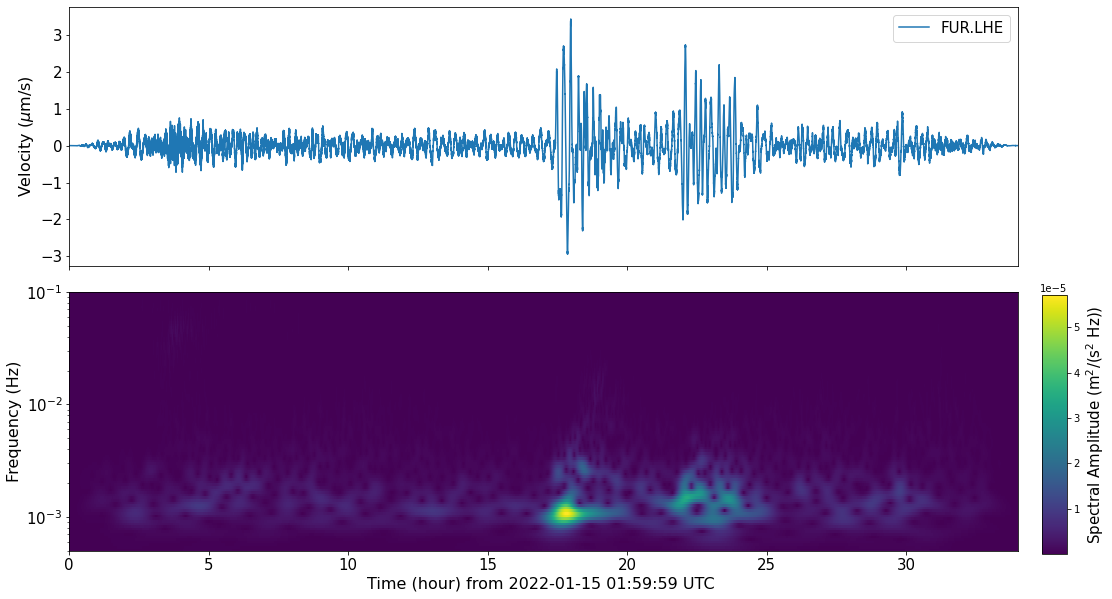

In [112]:
__makeplot_trace_cwt(    
                    st.select(channel="*E")[0],
                    f_lower=0.0005,
                    f_upper=config['fmax'],
                    full_output=False,
                    unit="hour",
                    cbar_log=False,
                    f_scale_log=True,
                    normalize=False,
                    );